 plot the primary forest change inside and outside the protected area in Haiti and the Dominican Republic

In [1]:
import numpy as np
from os.path import join
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as plticker
import seaborn as sns
import os

def pf_pa_stacked_plot(axes,
                       list_year,
                       values_plot,
                       x_label='Year',
                       y_label='Primary forest area ($\mathregular{km^2}$)',
                       title=None,
                       legend_flag=False,
                       ):
    """
        plot the stacked figure to show the PF inside and outside the protected area change
    """

    legend_label_size = 26
    tick_label_size = 26
    xaxis_label_size = 30
    title_label_size = 34
    ticklength = 6
    axes_linewidth = 1.5

    matplotlib.rcParams['axes.linewidth'] = axes_linewidth
    for i in axes.spines.values():
        i.set_linewidth(axes_linewidth)
    matplotlib.rcParams['font.family'] = 'arial'

    for i in range(0, 2):
        axes.bar(list_year, values_plot[i], bottom=np.sum(values_plot[:i], axis=0))

    axes.tick_params('x', labelsize=tick_label_size, direction='out', length=ticklength, width=axes_linewidth, bottom=True, which='major')
    axes.tick_params('y', labelsize=tick_label_size, direction='out', length=ticklength, width=axes_linewidth, left=True, which='major')

    axes.set_xlabel(x_label, size=xaxis_label_size)
    axes.set_ylabel(y_label, size=xaxis_label_size)

    axes.xaxis.set_major_locator(plticker.MultipleLocator(base=2.0))

    plt.title(title, fontsize=title_label_size)
    plt.tight_layout()

    labels_legend = ['PF inside protected area', 'PF outside protected area']
    if legend_flag:
        axes.legend(labels=labels_legend, loc='upper right', fontsize=legend_label_size)


def sum_stacked_plot(sheet_pa, list_year):

    sns.set_theme()
    
    figure, axes = plt.subplots(ncols=2, nrows=2, figsize=(30, 16))
    
    values_plot = sheet_pa.iloc[:, 6:8].values.T * 900 / 1000 / 1000
    pf_pa_stacked_plot(axes[0, 0],
                       list_year,
                       values_plot,
                       x_label='Year',
                       y_label='Primary forest area (km$\mathregular{^2}$)',
                       title='Haiti: Primary wet forest',
                       legend_flag=True
                       )

    values_plot = sheet_pa.iloc[:, 9:11].values.T * 900 / 1000 / 1000
    pf_pa_stacked_plot(axes[0, 1],
                       list_year,
                       values_plot,
                       x_label='Year',
                       y_label='Primary forest area (km$\mathregular{^2}$)',
                       title='Haiti: Primary dry forest',
                       )

    values_plot = sheet_pa.iloc[:, 15:17].values.T * 900 / 1000 / 1000
    pf_pa_stacked_plot(axes[1, 0],
                       list_year,
                       values_plot,
                       x_label='Year',
                       y_label='Primary forest area (km$\mathregular{^2}$)',
                       title='Dominican Republic: Primary wet forest',
                       )

    values_plot = sheet_pa.iloc[:, 18:20].values.T * 900 / 1000 / 1000
    pf_pa_stacked_plot(axes[1, 1],
                       list_year,
                       values_plot,
                       x_label='Year',
                       y_label='Primary forest area (km$\mathregular{^2}$)',
                       title='Dominican Republic: Primary dry forest',
                       )
    
    plt.tight_layout()
    plt.show()

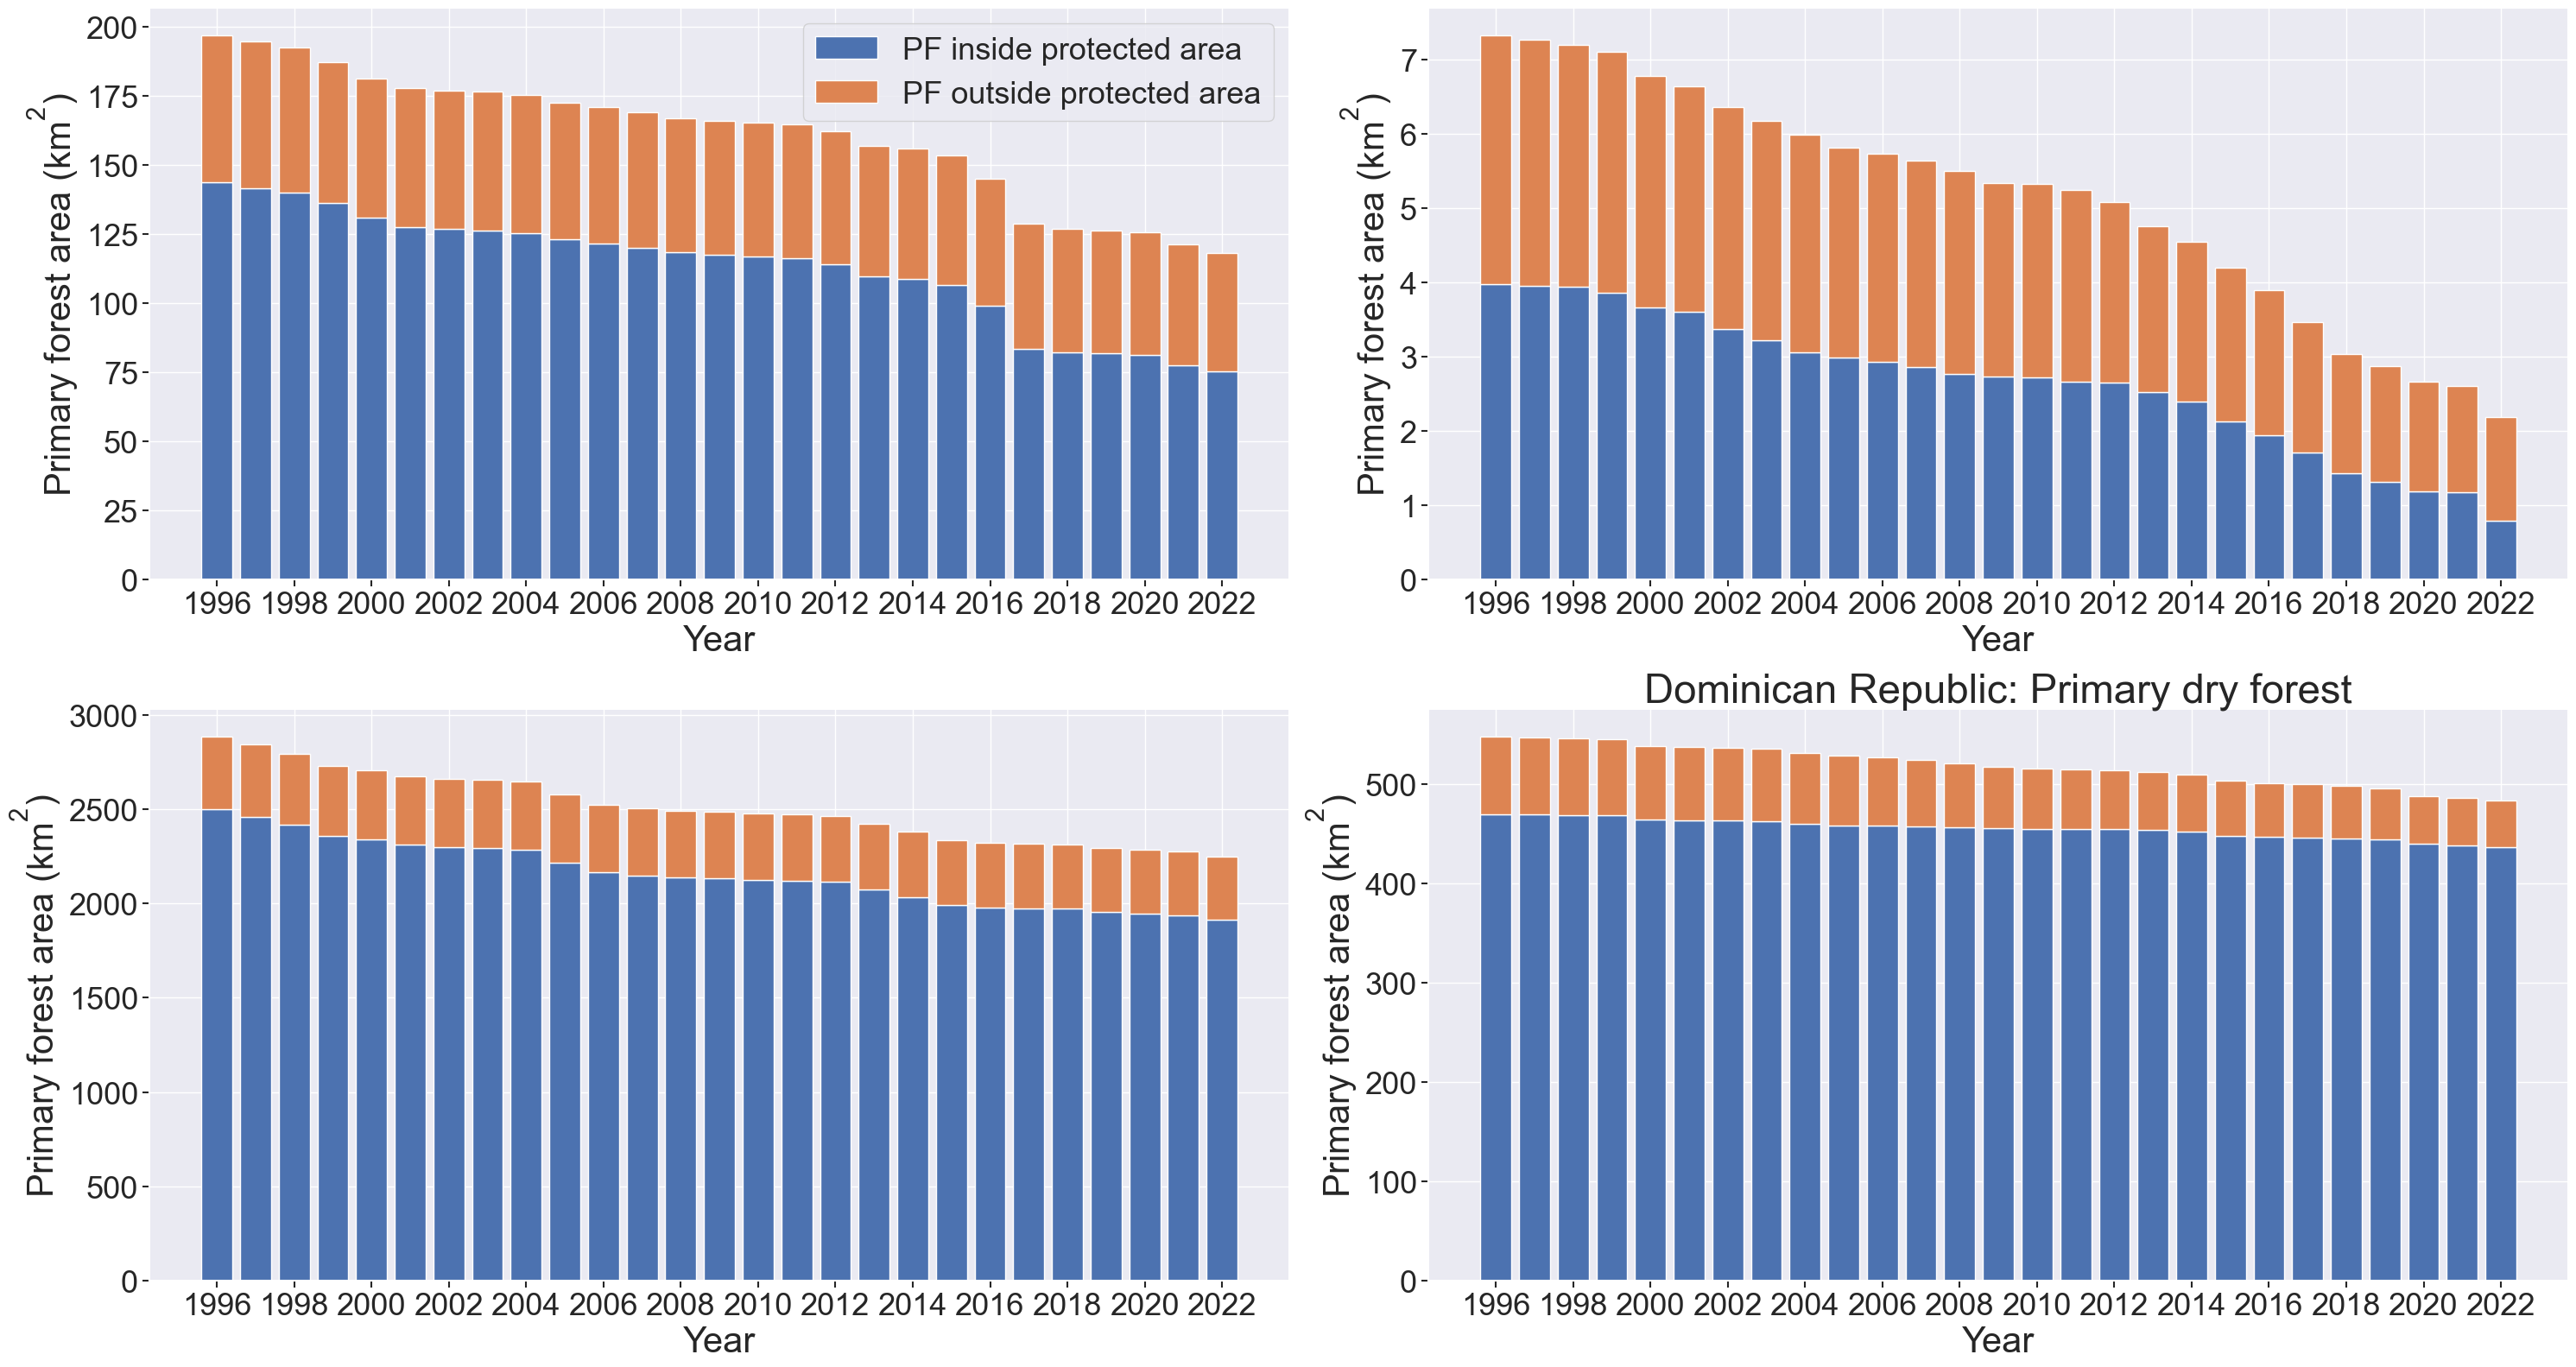

In [2]:
pwd = os.getcwd()
rootpath = os.path.abspath(os.path.join(pwd, '..'))

filename_percentile = join(rootpath, 'results', 'pa_pf_count.xlsx')
sheet_pa = pd.read_excel(filename_percentile)

list_year = sheet_pa['year'].values

sum_stacked_plot(sheet_pa, list_year)

In [3]:
# calculate the average percentage of PF inside and outside the protected area in Haiti and the Dominican Republic
haiti_pf_inside_pct = sheet_pa['haiti_pf_inside_pa'] / sheet_pa['haiti_pf_num']
haiti_pf_outside_pct = sheet_pa['haiti_pf_outside_pa'] / sheet_pa['haiti_pf_num']

dr_pf_inside_pct = sheet_pa['dr_pf_inside_pa'] / sheet_pa['dr_pf_num']
dr_pf_outside_pct = sheet_pa['dr_pf_outside_pa'] / sheet_pa['dr_pf_num']

print(f'average percentage of PF inside the protected area in Haiti: {np.nanmean(haiti_pf_inside_pct * 100):.2f}%')
print(f'average percentage of PF outside the protected area in Haiti: {np.nanmean(haiti_pf_outside_pct * 100):.2f}%')

print(f'average percentage of PF inside the protected area in the Dominican Republic: {np.nanmean(dr_pf_inside_pct * 100):.2f}%')
print(f'average percentage of PF outside the protected area in the Dominican Republic: {np.nanmean(dr_pf_outside_pct * 100):.2f}%')

average percentage of PF inside the protected area in Haiti: 69.08%
average percentage of PF outside the protected area in Haiti: 30.92%
average percentage of PF inside the protected area in the Dominican Republic: 86.22%
average percentage of PF outside the protected area in the Dominican Republic: 13.78%
